# Ajuste del modelo

## Ajuste de modelos generativos con la conjunta

**Parámetros:** $\;\boldsymbol{\theta}=(\boldsymbol{\pi}, \boldsymbol{\theta}'),\,$ donde $\boldsymbol{\pi}$ son las priors de las clases y $\boldsymbol{\theta}'$ los parámetros que gobiernan las condicionales de las clases

**Función de probabilidad a priori de las etiquetas de clase:** $\;$ categórica gobernada por $\boldsymbol{\pi}$
$$p(y\mid\boldsymbol{\pi})=\operatorname{Cat}(y\mid\boldsymbol{\pi})=\prod_c \pi_c^{\mathbb{I}(y=c)}$$

**Función de verosimilitud conjunta:** $\;$ de $\,\boldsymbol{\theta}\,$ respecto a $N$ datos, $\,\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}$
$$\begin{align*}
p(\mathcal{D}\mid\boldsymbol{\theta})%
&=\prod_n p(\boldsymbol{x}_n,y_n\mid\boldsymbol{\theta})&&\text{(muestras i.i.d.)}\\%
&=\prod_n p(y_n\mid\boldsymbol{\pi})\,p(\boldsymbol{x}_n\mid y_n, \boldsymbol{\theta}')&&\text{(regla producto)}\\%
&=\prod_n \prod_c (p(y_n=c\mid\boldsymbol{\pi})\,p(\boldsymbol{x}_n\mid y_n=c, \boldsymbol{\theta}'))^{\mathbb{I}(y_n=c)}%
&&\text{(explicitando $c$)}\\%
&=\prod_c \prod_n \pi_c^{\mathbb{I}(y_n=c)}\prod_c \prod_n p(\boldsymbol{x}_n\mid y_n=c, \boldsymbol{\theta}')^{\mathbb{I}(y_n=c)}%
&&\text{(reodenando factores)}
\end{align*}$$

**Función de log-verosimilitud conjunta:** $\;$ sea $\;N_c=\sum_n\mathbb{I}(y_n=c)$
$$\begin{align*}
\log p(\mathcal{D}\mid\boldsymbol{\theta})%
&=\left[\sum_c\sum_n\mathbb{I}(y_n=c)\log\pi_c\right] +
\left[\sum_c\sum_n\mathbb{I}(y_n=c)\log p(\boldsymbol{x}_n\mid y_n=c, \boldsymbol{\theta}')\right]\\%
&=\sum_c N_c\log\pi_c + \sum_c\sum_{n:y_n=c}\log p(\boldsymbol{x}_n\mid y_n=c, \boldsymbol{\theta}')%
\end{align*}$$

**Maximización:** $\;$ el MLE de la conjunta, $\hat{\boldsymbol{\theta}}=(\hat{\boldsymbol{\pi}}, \hat{\boldsymbol{\theta}}')$, puede hallarse mediante maximización separada en $\boldsymbol{\pi}$ y $\boldsymbol{\theta}'$ (con restricciones)
$$\hat{\boldsymbol{\theta}}=\operatorname*{argmax}_{\boldsymbol{\theta}}\;\log p(\mathcal{D}\mid\boldsymbol{\theta})%
\quad\Leftrightarrow\quad%
\hat{\boldsymbol{\pi}}=\operatorname*{argmax}_{\boldsymbol{\pi}\in\mathcal{C}_{\boldsymbol{\pi}}}\sum_c N_c\log\pi_c%
\quad\text{y}\quad%
\hat{\boldsymbol{\theta}}'=\operatorname*{argmax}_{\boldsymbol{\theta}'\in\mathcal{C}_{\boldsymbol{\theta}'}}\sum_c\sum_{n:y_n=c}\log p(\boldsymbol{x}_n\mid y_n=c, \boldsymbol{\theta}')$$

**Maximización en $\boldsymbol{\pi}$:** $\;$ sujeta a las restricciones de probabilidad; introducimos un multiplicador de Lagrange para la de igualdad (suma $1$)
$$\hat{\boldsymbol{\pi}}=\operatorname*{argmax}_{\boldsymbol{\pi}}\;\max_{\lambda}\;%
\sum_c N_c\log\pi_c+\lambda\left(\left(\sum_c\pi_c\right)-1\right)\quad\Rightarrow\quad\hat{\pi}_c=\frac{N_c}{N}$$

## Análisis discriminante cuadrático

**Log-verosimilitud conjunta:** $\;\boldsymbol{\theta}'=\{\boldsymbol{\theta}_c\},\,$ $\boldsymbol{\theta}_c=(\boldsymbol{\mu}_c^t, \operatorname{vec}(\mathbf{\Sigma}_c))^t$
$$\begin{align*}
\log p(\mathcal{D}\mid\boldsymbol{\theta})%
&=\sum_c N_c\log\pi_c + \sum_c\sum_{n:y_n=c}\log \mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma}_c)\\%
\end{align*}$$

**Maximización en $\boldsymbol{\theta}'$:** $\;\hat{\boldsymbol{\theta}}'\,$ puede hallarse mediante maximización separada en
cada $\boldsymbol{\theta}_c$ (con restricciones)
$$\hat{\boldsymbol{\theta}}'=\operatorname*{argmax}_{\boldsymbol{\theta}'\in\mathcal{C}_{\boldsymbol{\theta}'}}\sum_c\sum_{n:y_n=c}\log \mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma}_c)%
\quad\Leftrightarrow\quad%
\hat{\boldsymbol{\theta}}_c=\operatorname*{argmax}_{\boldsymbol{\theta}_c\in\mathcal{C}_{\boldsymbol{\theta}_c}}\sum_{n:y_n=c}\log \mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma}_c)\quad\text{para todo $c$}$$

**Maximización en $\boldsymbol{\theta}_c'$:** $\;$ $\hat{\boldsymbol{\mu}}_c$ y $\hat{\mathbf{\Sigma}}_c$ se hallan a partir de los datos de la clase $c$ como si se tratara del MLE de una única Gaussiana
$$\begin{align*}
\hat{\boldsymbol{\mu}}_c&=\frac{1}{N_c}\sum_{n:y_n=c}\boldsymbol{x}_n\\%
\hat{\mathbf{\Sigma}}_c&=\frac{1}{N_c}\sum_{n:y_n=c}(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)^t%
\end{align*}$$

**Ejemplo:** $\;C=3$, $\;D=2$, $\;\pi_1=\pi_2=\pi_3=1/3$
$$\begin{align*}
\boldsymbol{\mu}_1&=(0, 0)^t & \boldsymbol{\mu}_2&=(0, 4)^t & \boldsymbol{\mu}_3&=(4, 4)^t\\%
\mathbf{\Sigma}_1&=\begin{pmatrix}4&1\\1&2\end{pmatrix}%
&\mathbf{\Sigma}_2&=\begin{pmatrix}2&0\\0&1\end{pmatrix}%
&\mathbf{\Sigma}_3&=\begin{pmatrix}1&0\\0&1\end{pmatrix}%
\end{align*}$$

In [1]:
import numpy as np
from scipy.stats import multinomial, multivariate_normal
import matplotlib.pyplot as plt
N = 50 # >=3 para tener al menos un dato por clase; >>3 para evitar matrices singulares
pi1 = pi2 = pi3 = 1/3
yy = multinomial(1, [pi1, pi2, pi3]).rvs(N - 3)
N1 = yy[yy[:, 0] == 1].shape[0] + 1
N2 = yy[yy[:, 1] == 1].shape[0] + 1
N3 = N - N1 - N2
hpi1 = N1/N; hpi2 = N2/N; hpi3 = N3/N
xxy1 = multivariate_normal([0, 0], [[4, 1], [1, 2]]).rvs(N1)
m1 = xxy1.mean(axis=0); S1 = np.cov(xxy1, rowvar=False, bias=True); iS1 = np.linalg.inv(S1)
xxy2 = multivariate_normal([0, 4], [[2, 0], [0, 1]]).rvs(N2)
m2 = xxy2.mean(axis=0); S2 = np.cov(xxy2, rowvar=False, bias=True); iS2 = np.linalg.inv(S2)
xxy3 = multivariate_normal([4, 4], np.eye(2)).rvs(N3)
m3 = xxy3.mean(axis=0); S3 = np.cov(xxy3, rowvar=False, bias=True); iS3 = np.linalg.inv(S3)
print("Medias: ", m1, m2, m3, "\nSigmas:\n", S1, "\n", S2, "\n", S3)

Medias:  [-0.16352967  0.43030524] [-0.08028066  3.7620914 ] [4.28623431 3.86015475] 
Sigmas:
 [[2.53607629 0.48662071]
 [0.48662071 2.03151431]] 
 [[ 1.87691974 -0.25945071]
 [-0.25945071  1.14489211]] 
 [[0.6879304  0.02505737]
 [0.02505737 1.10500998]]


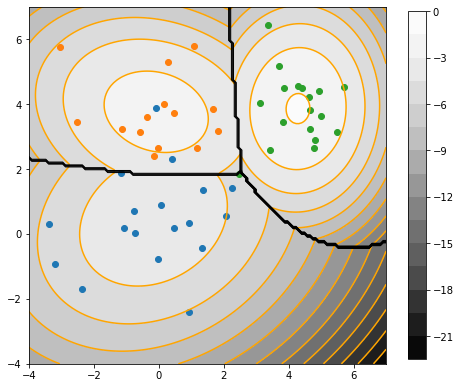

In [2]:
A1, b1, c1 = -0.5 * iS1, iS1 @ m1, np.log(hpi1) - 0.5 * np.linalg.det(S1) - 0.5 * m1.T @ iS1 @ m1
A2, b2, c2 = -0.5 * iS2, iS2 @ m2, np.log(hpi2) - 0.5 * np.linalg.det(S2) - 0.5 * m2.T @ iS2 @ m2
A3, b3, c3 = -0.5 * iS3, iS3 @ m3, np.log(hpi3) - 0.5 * np.linalg.det(S3) - 0.5 * m3.T @ iS3 @ m3
x1, x2 = np.meshgrid(np.linspace(-4, 7, num=128), np.linspace(-4, 7, num=128))
x = np.c_[np.ravel(x1), np.ravel(x2)]
p1 =  lambda x: x.T @ A1 @ x + b1 @ x + c1
p2 =  lambda x: x.T @ A2 @ x + b2 @ x + c2
p3 =  lambda x: x.T @ A3 @ x + b3 @ x + c3
maxp = lambda x: max(p1(x), p2(x), p3(x))
maxpx = np.apply_along_axis(maxp, 1, x)
amaxp = lambda x: np.argmax([p1(x), p2(x), p3(x)])
amaxpx = np.apply_along_axis(amaxp, 1, x)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal')
ax.contour(x1, x2, maxpx.reshape(x1.shape), 16, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, maxpx.reshape(x1.shape), 16, cmap='Greys_r')
ax.contour(x1, x2, amaxpx.reshape(x1.shape), colors='black', linestyles='solid', linewidths=1)
plt.colorbar(cp, ax=ax, shrink=0.8)
ax.set_xlim(-4, 7); ax.set_ylim(-4, 7)
plt.scatter(xxy1[:, 0], xxy1[:, 1])
plt.scatter(xxy2[:, 0], xxy2[:, 1])
plt.scatter(xxy3[:, 0], xxy3[:, 1]);

## Análisis discriminante lineal

**Log-verosimilitud conjunta:** $\;\boldsymbol{\theta}'=(\boldsymbol{\mu}_1^t,\dotsc,\boldsymbol{\mu}_C^t,\operatorname{vec}(\mathbf{\Sigma}))^t$
$$\begin{align*}
\log p(\mathcal{D}\mid\boldsymbol{\theta})%
&=\sum_c N_c\log\pi_c + \sum_c\sum_{n:y_n=c}\log \mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma})\\%
\end{align*}$$

**Maximización en $\boldsymbol{\theta}'$:** $\;$ no puede hacerse clase a clase, separadamente, porque las condicionales comparten una misma $\mathbf{\Sigma}$
$$\hat{\boldsymbol{\theta}}'=\operatorname*{argmax}_{\boldsymbol{\theta}'\in\mathcal{C}_{\boldsymbol{\theta}'}}\sum_c\sum_{n:y_n=c}\log \mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma})$$
No obstante, la única diferencia respecto a QDA es que $\hat{\mathbf{\Sigma}}$ se obtiene con todos los datos:
$$\begin{align*}
\hat{\boldsymbol{\mu}}_c&=\frac{1}{N_c}\sum_{n:y_n=c}\boldsymbol{x}_n\\%
\hat{\mathbf{\Sigma}}&=\frac{1}{N}\sum_c\sum_{n:y_n=c}(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)^t%
\end{align*}$$

**Ejemplo:** $\;C=3$, $\;D=2$, $\;\pi_1=\pi_2=\pi_3=1/3$
$$\begin{align*}
\boldsymbol{\mu}_1&=(0, 0)^t & \boldsymbol{\mu}_2&=(0, 4)^t & \boldsymbol{\mu}_3&=(4, 4)^t\\%
\mathbf{\Sigma}&=\begin{pmatrix}1&0\\0&1\end{pmatrix}&%
\mathbf{\Sigma}^{-1}&=\begin{pmatrix}1&0\\0&1\end{pmatrix}&&%
\end{align*}$$

In [3]:
import numpy as np
from scipy.stats import multinomial, multivariate_normal
import matplotlib.pyplot as plt
N = 50 # >=3 para tener al menos un dato por clase; >>3 para evitar matrices singulares
pi1 = pi2 = pi3 = 1/3
yy = multinomial(1, [pi1, pi2, pi3]).rvs(N - 3)
N1 = yy[yy[:, 0] == 1].shape[0] + 1
N2 = yy[yy[:, 1] == 1].shape[0] + 1
N3 = N - N1 - N2
hpi1 = N1/N; hpi2 = N2/N; hpi3 = N3/N
xxy1 = multivariate_normal([0, 0], np.eye(2)).rvs(N1)
m1 = xxy1.mean(axis=0); S1 = np.cov(xxy1, rowvar=False, bias=True)
xxy2 = multivariate_normal([0, 4], np.eye(2)).rvs(N2)
m2 = xxy2.mean(axis=0); S2 = np.cov(xxy2, rowvar=False, bias=True)
xxy3 = multivariate_normal([4, 4], np.eye(2)).rvs(N3)
m3 = xxy3.mean(axis=0); S3 = np.cov(xxy3, rowvar=False, bias=True)
S = hpi1 * S1 + hpi2 * S2 + hpi3 * S3; iS = np.linalg.inv(S)
print("Medias: ", m1, m2, m3, "\nSigma:\n", S)

Medias:  [-0.26955704  0.0793533 ] [-0.12012179  3.84454666] [4.26426695 4.16074616] 
Sigma:
 [[1.18562159 0.03215417]
 [0.03215417 0.75699928]]


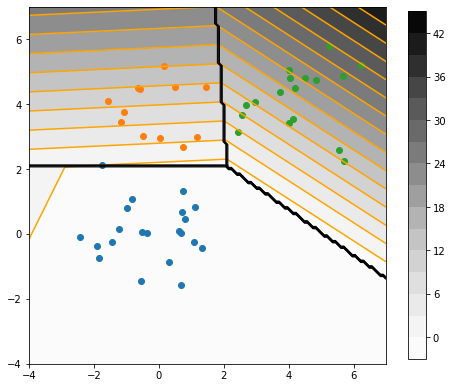

In [4]:
b1, c1 = iS @ m1, np.log(hpi1) - 0.5 * m1.T @ iS @ m1
b2, c2 = iS @ m2, np.log(hpi2) - 0.5 * m2.T @ iS @ m2
b3, c3 = iS @ m3, np.log(hpi3) - 0.5 * m3.T @ iS @ m3
x1, x2 = np.meshgrid(np.linspace(-4, 7, num=128), np.linspace(-4, 7, num=128))
x = np.c_[np.ravel(x1), np.ravel(x2)]
p1 =  lambda x: b1 @ x + c1
p2 =  lambda x: b2 @ x + c2
p3 =  lambda x: b3 @ x + c3
maxp = lambda x: max(p1(x), p2(x), p3(x))
maxpx = np.apply_along_axis(maxp, 1, x)
amaxp = lambda x: np.argmax([p1(x), p2(x), p3(x)])
amaxpx = np.apply_along_axis(amaxp, 1, x)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal')
ax.contour(x1, x2, maxpx.reshape(x1.shape), 16, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, maxpx.reshape(x1.shape), 16, cmap='Greys')
ax.contour(x1, x2, amaxpx.reshape(x1.shape), colors='black', linestyles='solid', linewidths=1)
plt.colorbar(cp, ax=ax, shrink=0.8)
ax.set_xlim(-4, 7); ax.set_ylim(-4, 7)
plt.scatter(xxy1[:, 0], xxy1[:, 1])
plt.scatter(xxy2[:, 0], xxy2[:, 1])
plt.scatter(xxy3[:, 0], xxy3[:, 1]);

## Matrices de covarianzas diagonales

**Motivación:** $\;$ aunque perdemos capacidad para capturar correlaciones entre variables, el número de parámetros pasa de cuadrático a lineal con $D$, cosa muy conveniente en la práctica cuando $D$ es grande

**QDA diagonal:** $\;$ reduce el número de parámetros de $\,O(CD^2)\,$ a $\,O(CD)$

**LDA diagonal:** $\;$ reduce el número de parámetros de $\,O(CD+D^2)\,$ a $\,O(CD)$

## Análisis discriminante regularizado

**Análisis discriminante regularizado (RDA):** $\;$ introduce un hiperparámetro de regularización $\lambda\in[0,1]$ con el fin de hallar un compromiso (no necesariamente extremo) entre una matriz de covarianzas completa y su diagonal,
$$\hat{\mathbf{\Sigma}}_{\text{rda}}=\lambda\operatorname{diag}(\hat{\mathbf{\Sigma}}_{\text{mle}})+(1-\lambda)\hat{\mathbf{\Sigma}}_{\text{mle}}$$

